In [1]:
from torchvision import datasets, transforms, utils
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np

# Fasion MNIST
패션 mnist데이터셋을 불러와 데이터를 확인하고 출력해보자!!
---

In [2]:
#텐서로 만들기 위한 변수
transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
#데이터셋 불러오기
trainset = datasets.FashionMNIST(
    root = './.data/', #여기에 저장
    train = True, #train이 True면 train데이터셋 불러오기
    download = True,
    transform = transform) #텐서로 변환
testset = datasets.FashionMNIST( 
    root = './.data/',
    train = False, #이건 test데이터셋 불러오는 문장!!
    download = True,
    transform = transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw



In [4]:
batch_size = 16 #배치 사이즈 선언!

#DataLoader로 데이터 핸들링하기
train_loader = data.DataLoader( 
    dataset = trainset,
    batch_size = batch_size)
test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size)

In [5]:
dataiter = iter(train_loader) #반복문 안에서 사용할 수 있게끔 iter!!
images, labels = next(dataiter) #데이터 불러오기

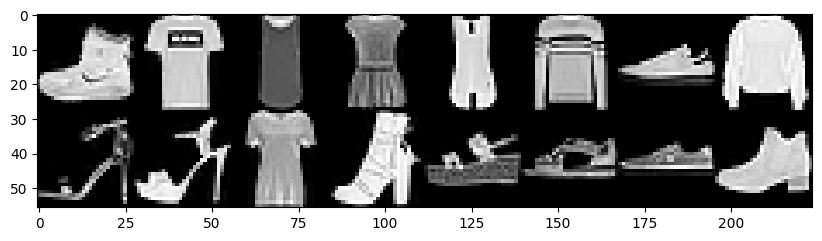

In [7]:
img = utils.make_grid(images,padding=0) #utils.make_grid로 이미지를 모아 1개로 만들기
npimg = img.numpy() #출력을 위해 넘파이로 바꾸고
plt.figure(figsize=(10,7)) #출력 사이즈 정하고
plt.imshow(np.transpose(npimg,(1,2,0))) #차원 순서 바꾸고
plt.show() #출력!!

In [8]:
print(labels) #라벨 뽑아 보기

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [9]:
# 이름 붙여서
CLASSES = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [10]:
#이름 별로 뽑아보기
for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


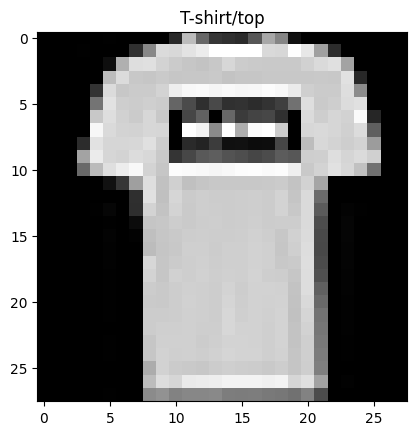

In [11]:
idx =1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy() #넘파이 이미지로 변환
plt.title(CLASSES[labels[idx].item()]) #이름을 타이틀로 넣고
plt.imshow(item_npimg,cmap='gray') #이미지 출력 설정바꾸고
plt.show()#출력!!